In [33]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
plt.style.use('fivethirtyeight')
%matplotlib inline

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for path
data = pd.read_csv (r'C:\Users\Rafi Sunggoro\VizBizz/Belajar VizBizz/3.PR/PR05/Mall_Customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


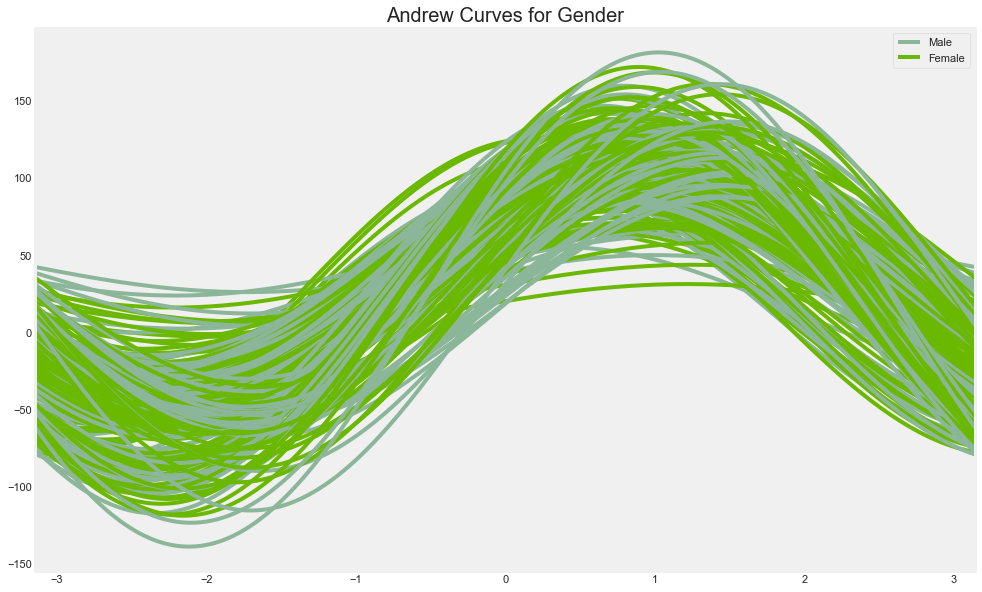

In [34]:
plt.rcParams['figure.figsize'] = (15, 10)


plotting.andrews_curves(data.drop("CustomerID", axis=1), "Gender")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

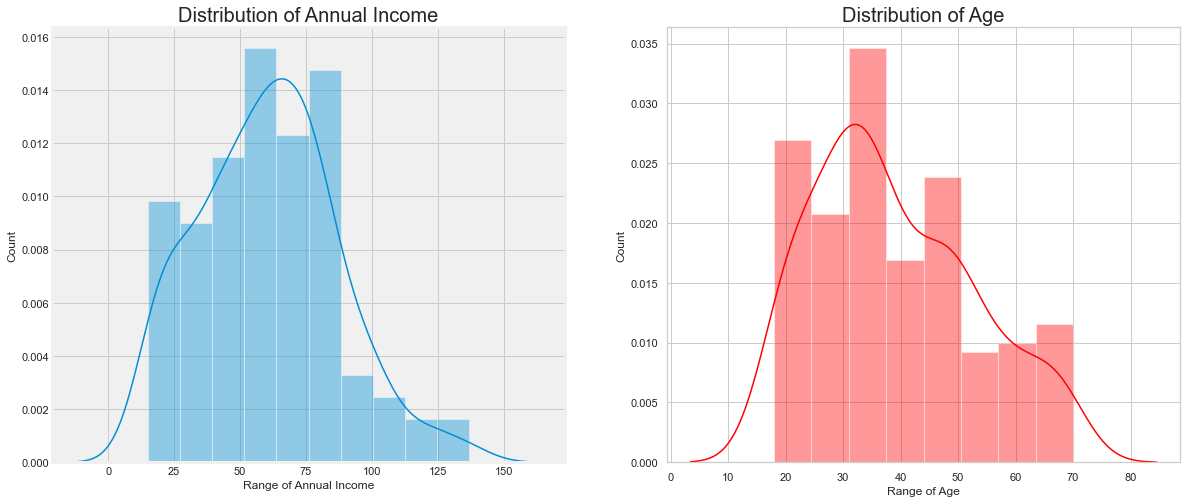

In [35]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

plt.savefig('Distribution.png')
plt.show()

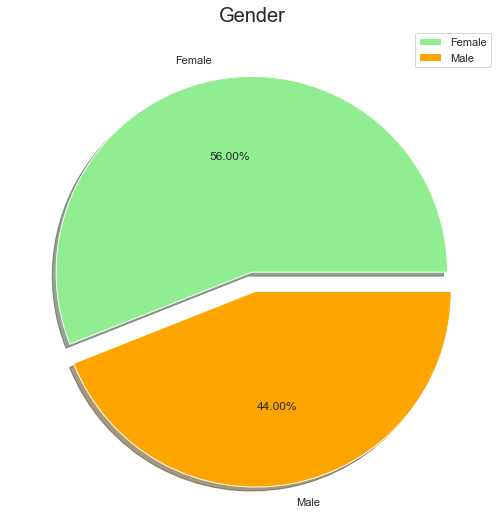

In [36]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.savefig('Gender.png')
plt.show()

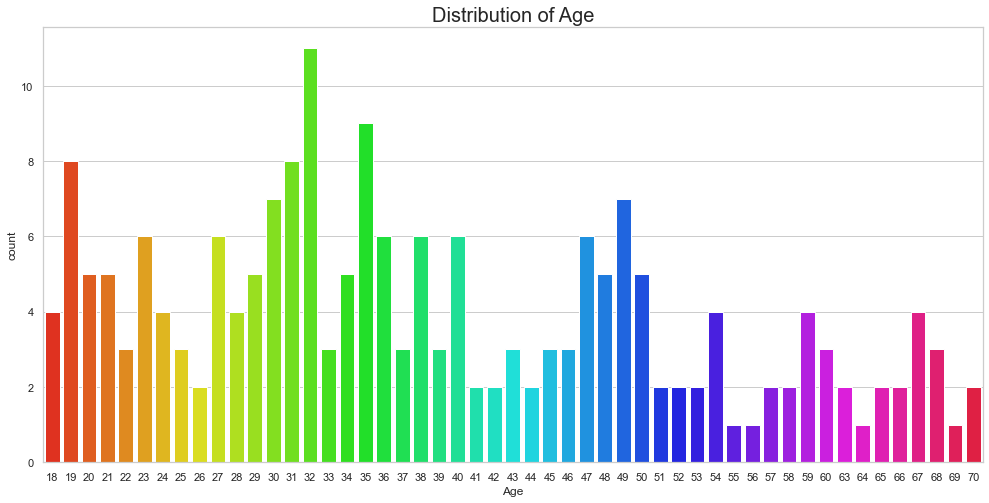

In [37]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

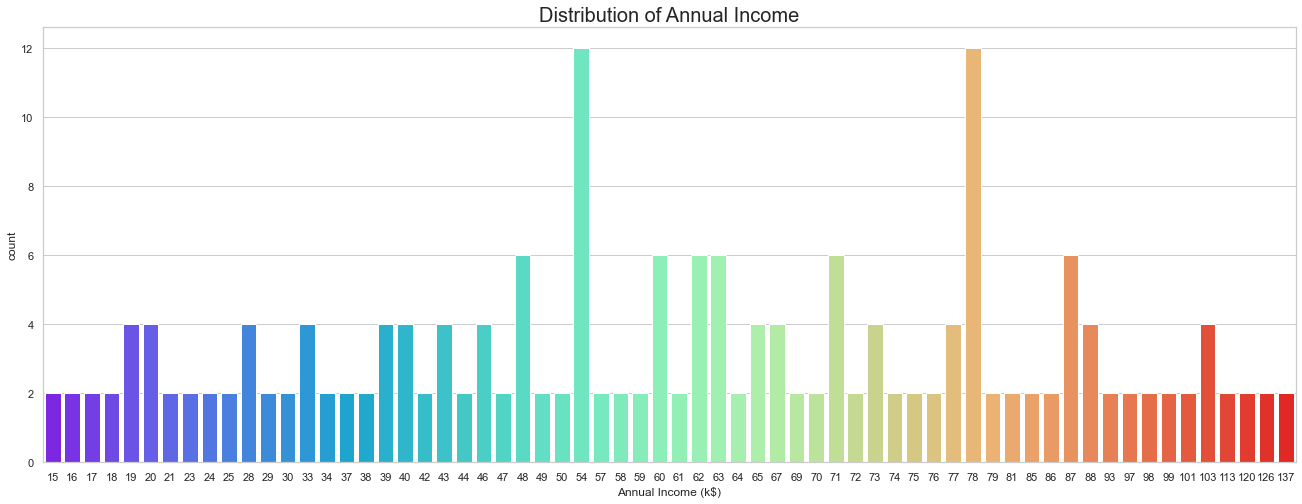

In [38]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

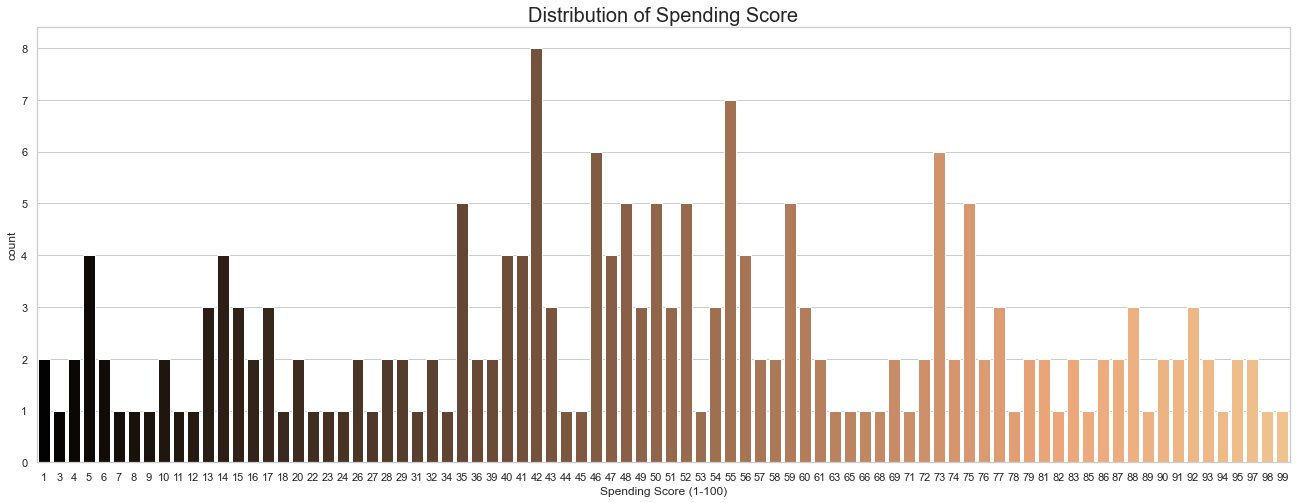

In [39]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

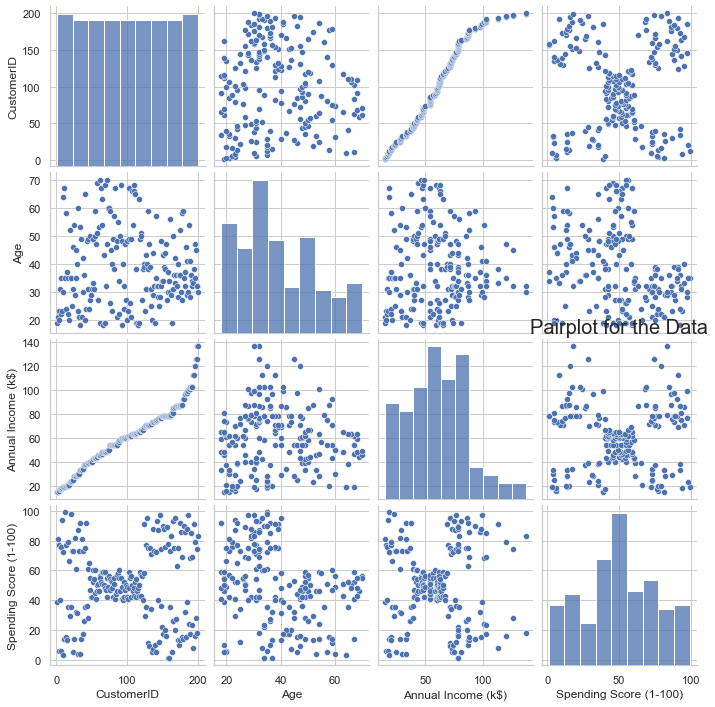

In [40]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

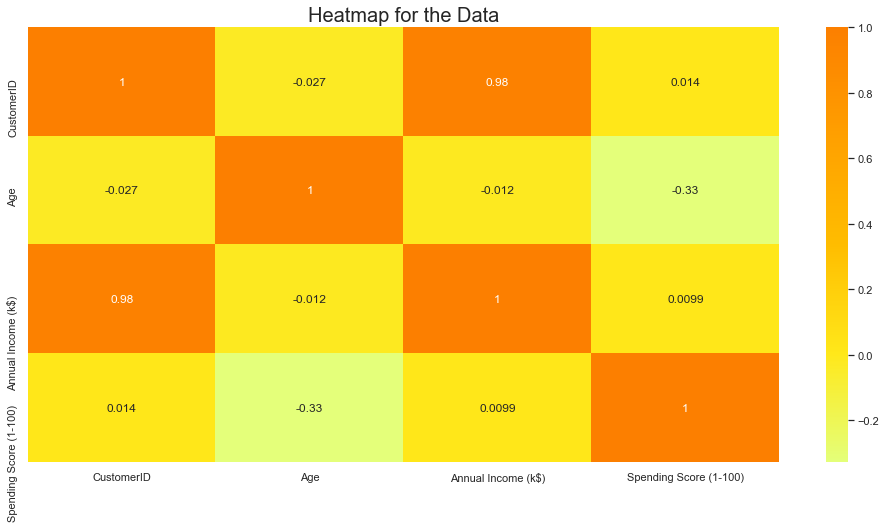

In [41]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

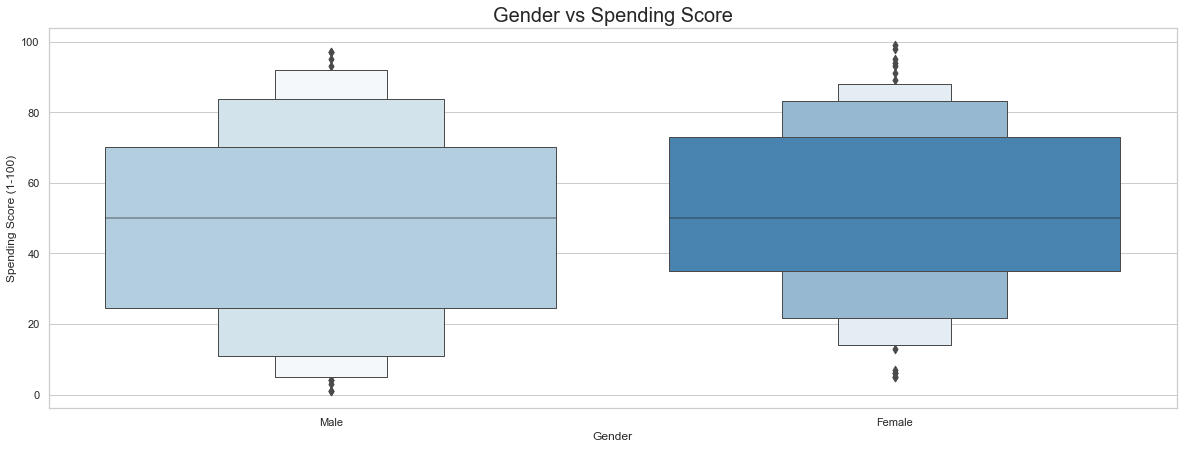

In [42]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.savefig('GenderVSSpendingScore.png')
plt.show()

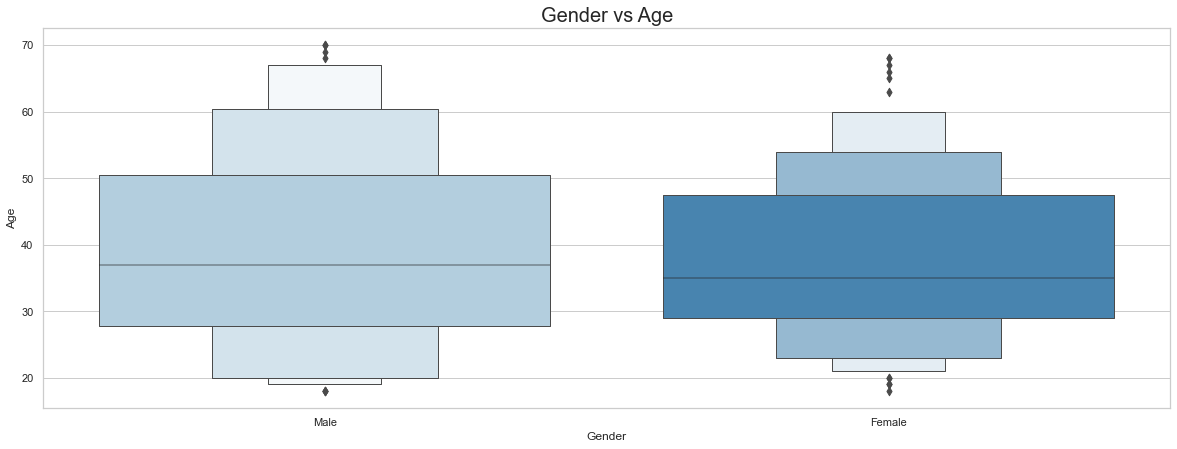

In [43]:
#  Gender vs Age

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Age'], palette = 'Blues')
plt.title('Gender vs Age', fontsize = 20)
plt.savefig('GenderVSAge.png')
plt.show()

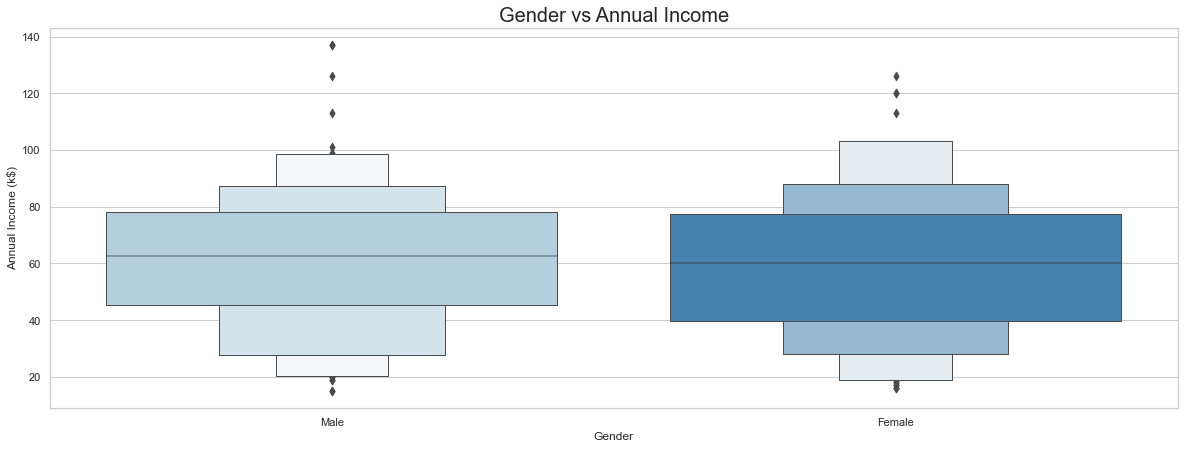

In [44]:
#  Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Annual Income (k$)'], palette = 'Blues')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.savefig('GenderVSAnnualIncome(k$).png')
plt.show()

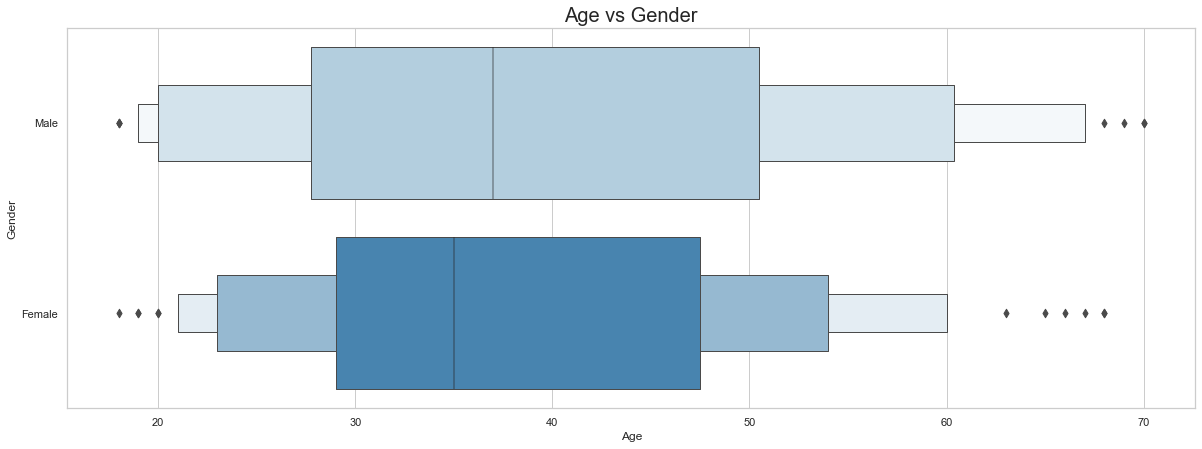

In [45]:
#  Age vs Gender

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Age'], data['Gender'], palette = 'Blues')
plt.title('Age vs Gender', fontsize = 20)
plt.savefig('AgeVSGender.png')
plt.show()

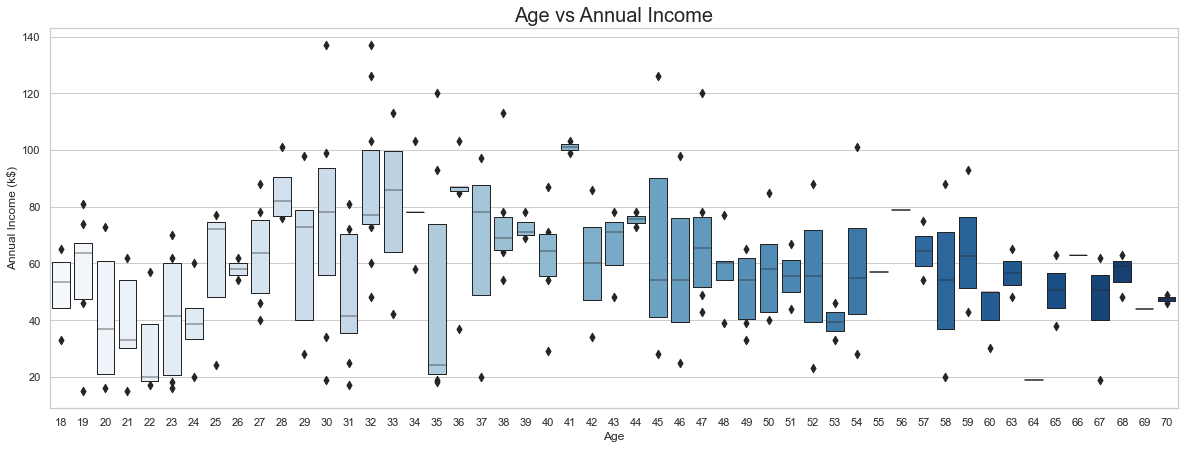

In [46]:
#  Age vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Age'], data['Annual Income (k$)'], palette = 'Blues')
plt.title('Age vs Annual Income', fontsize = 20)
plt.savefig('AgeVSAnnualIncome(k$).png')
plt.show()

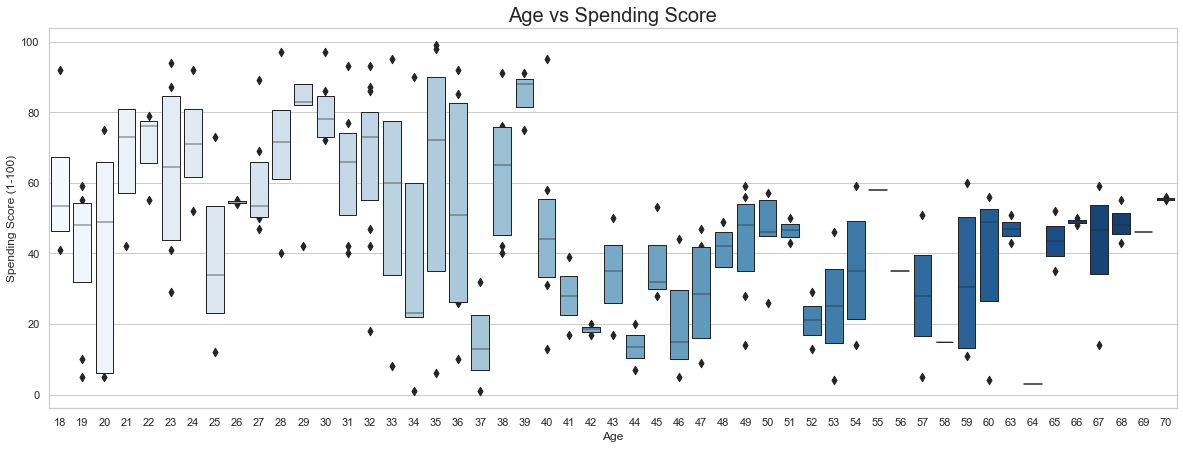

In [47]:
#  Age vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Age'], data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Age vs Spending Score', fontsize = 20)
plt.savefig('AgeVSSpendingscore.png')
plt.show()

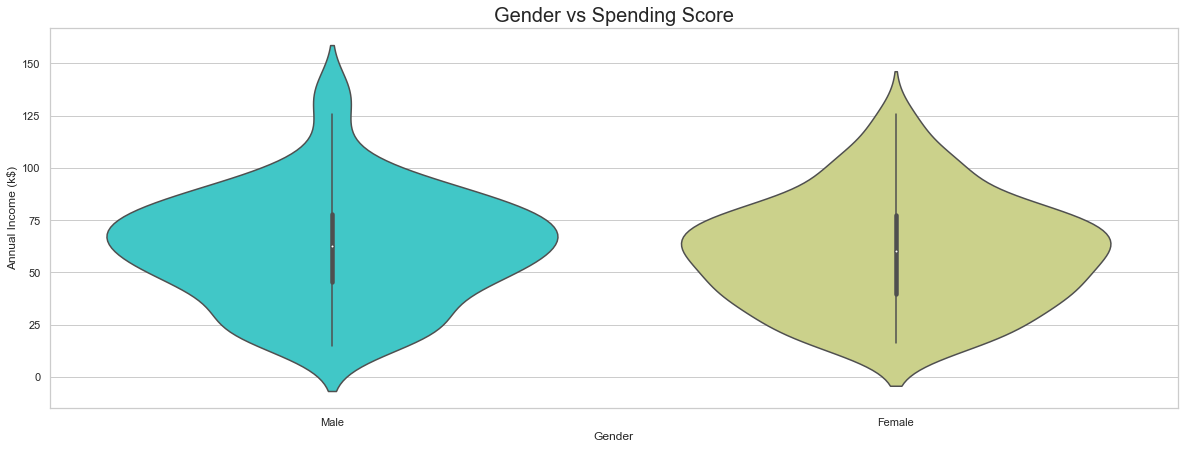

In [48]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

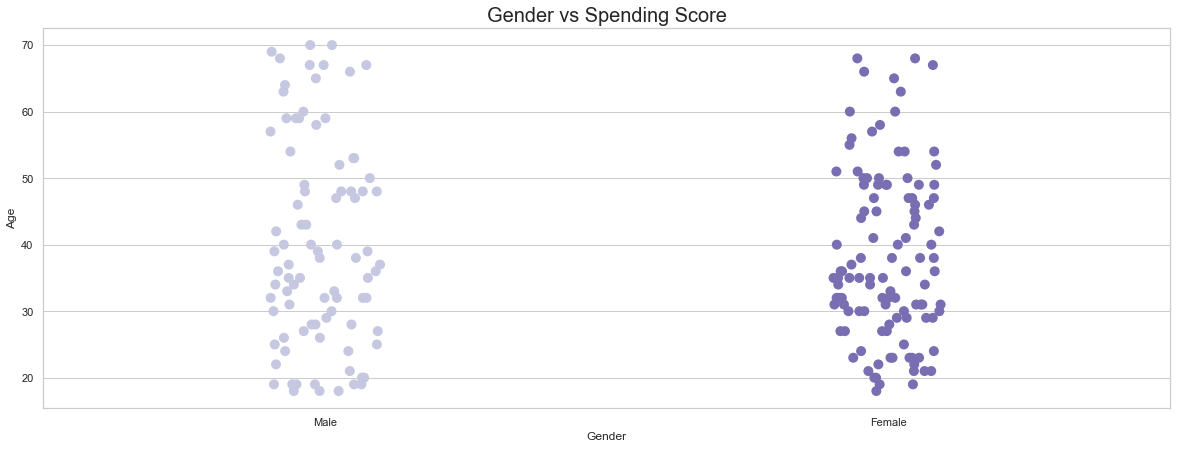

In [49]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

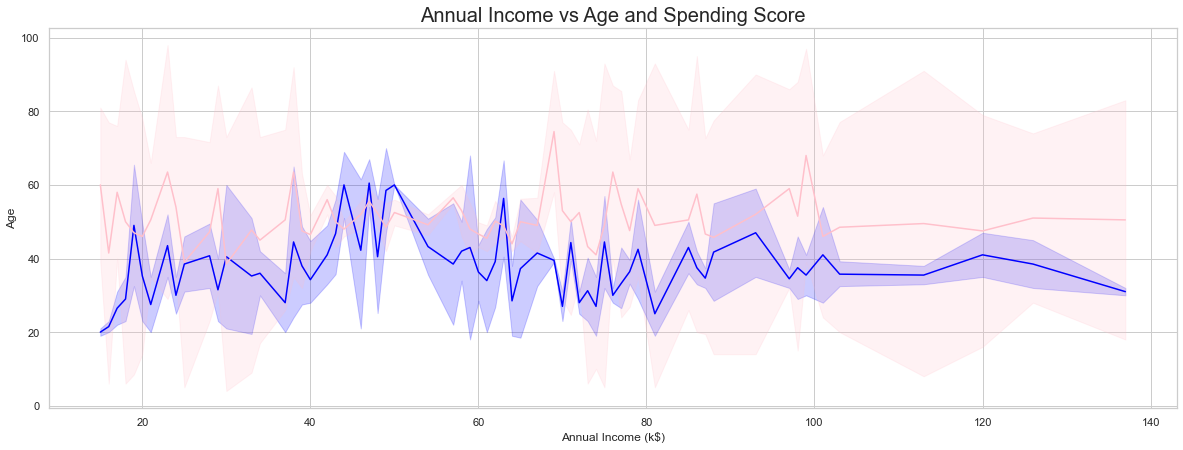

In [50]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [51]:
x = data.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


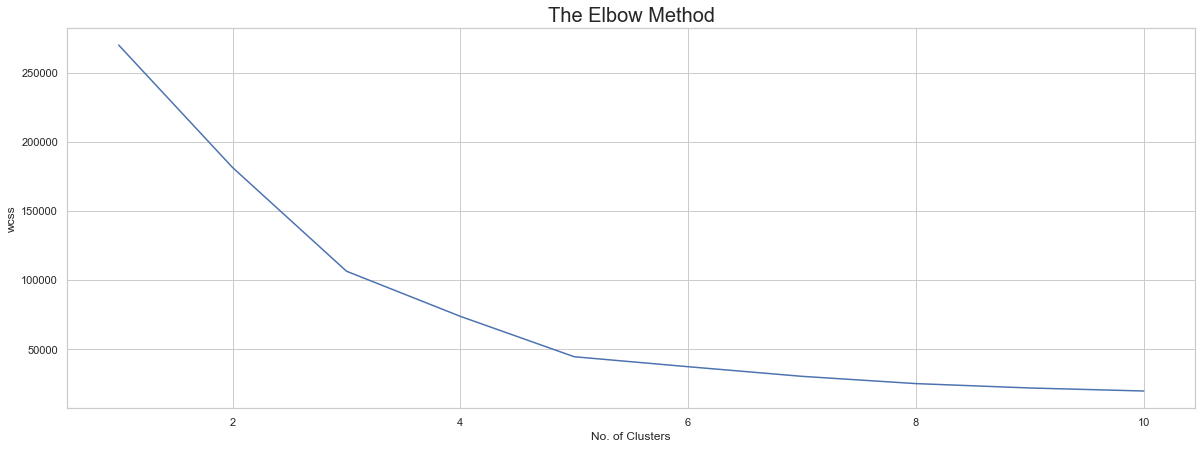

In [52]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

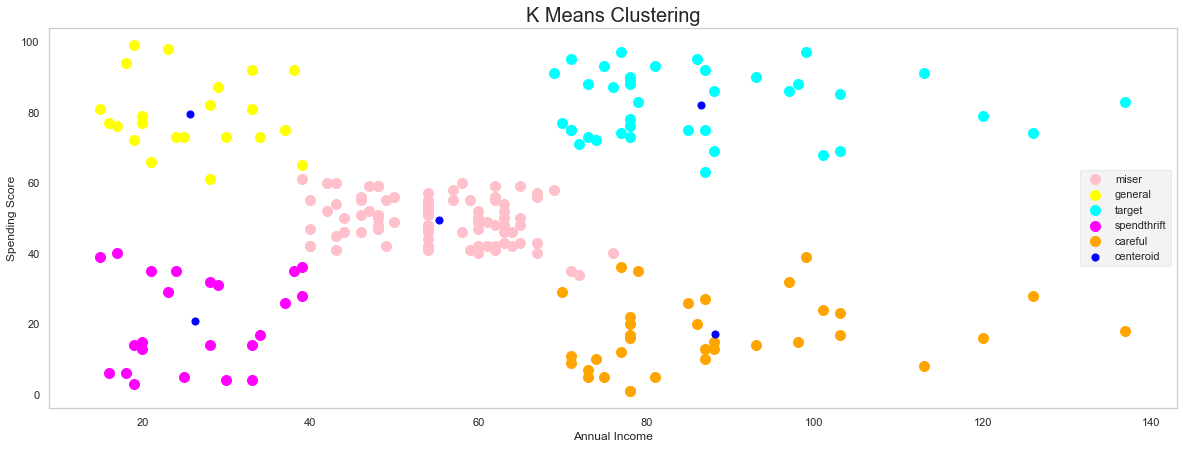

In [53]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.savefig('Clustering.png')
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

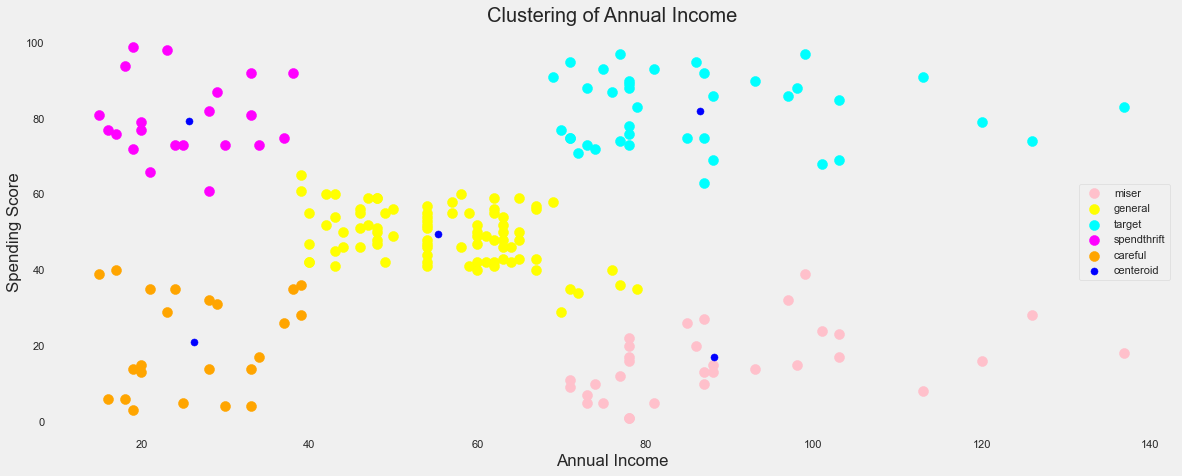

In [22]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Clustering of Annual Income', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.savefig('Clustering.png')
plt.show()

In [23]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

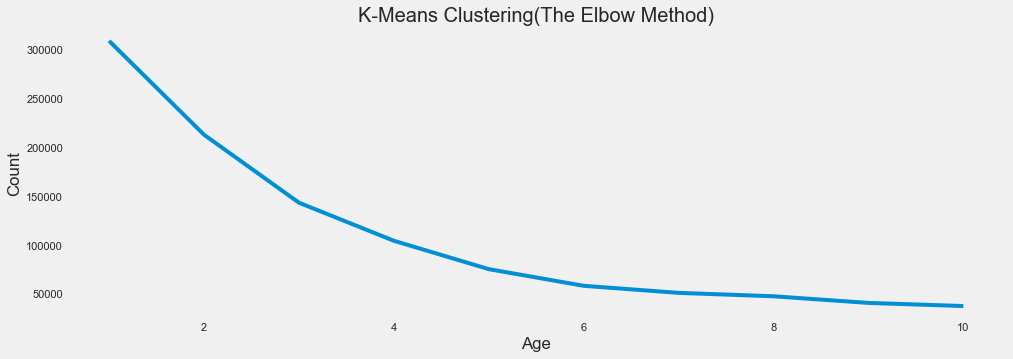

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

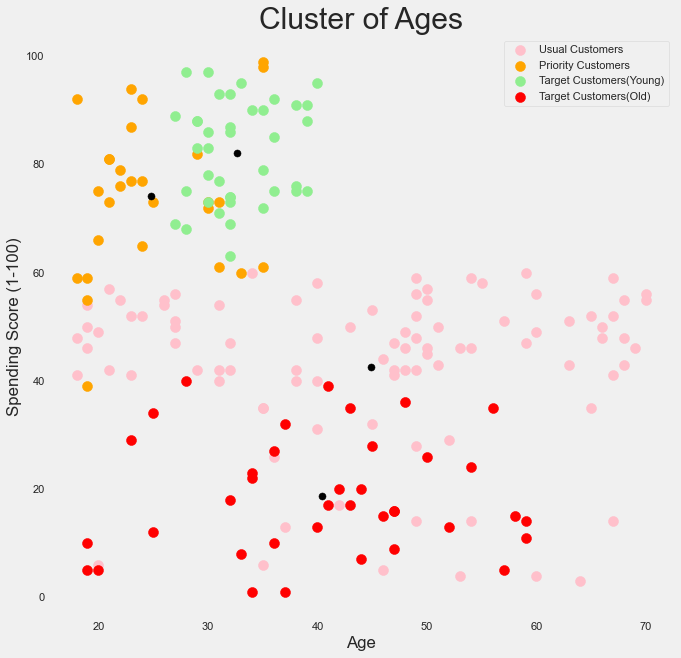

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.savefig('Clustering2.png')
plt.show()

In [26]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [27]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)